In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from warnings import filterwarnings
filterwarnings("ignore")

#### Q1 Read the data as an appropriate Time Series data and plot the data.

In [2]:
df1 = pd.read_csv('Sparkling.csv', parse_dates=['YearMonth'],  index_col = 'YearMonth')

In [3]:
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
df1.shape

(187, 1)

In [5]:
df2 = pd.read_csv('Rose.csv', parse_dates=['YearMonth'],  index_col = 'YearMonth')
df2.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [6]:
df2.shape

(187, 1)

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

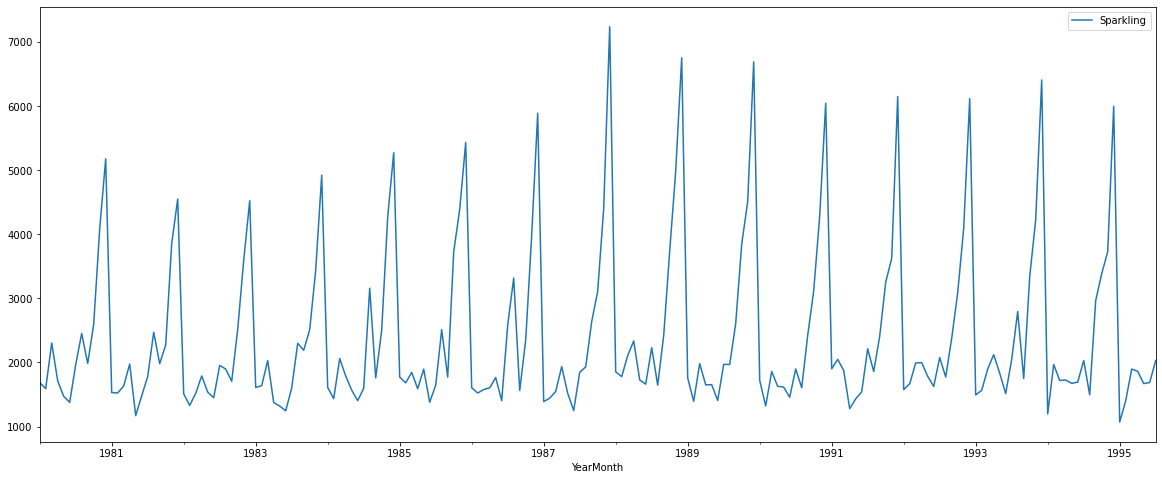

In [8]:
df1.plot()
plt.show()

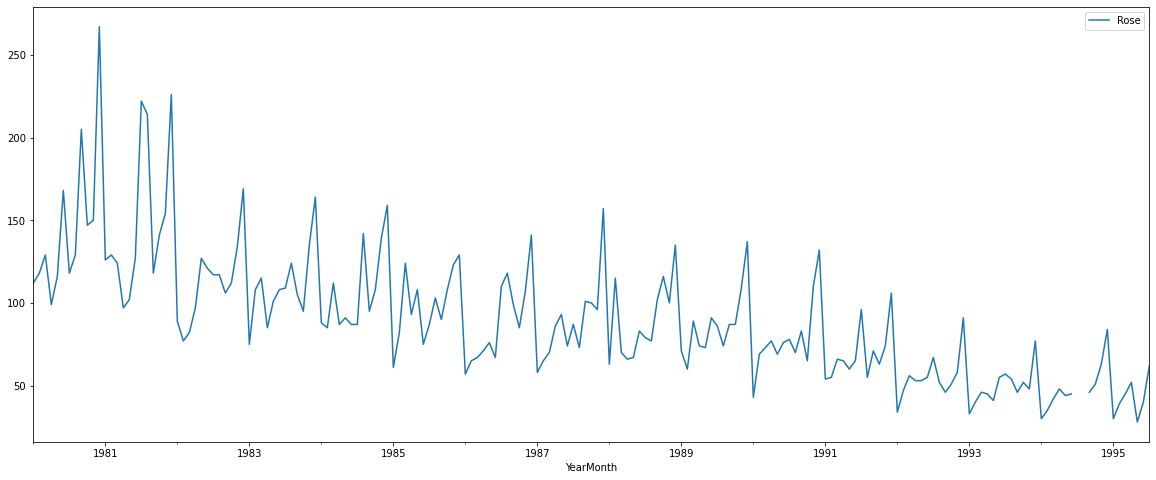

In [9]:
df2.plot()
plt.show()

#### Q2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
df1.shape

(187, 1)

In [11]:
df2.shape

(187, 1)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [14]:
df1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [15]:
df2.isnull().sum()

Rose    2
dtype: int64

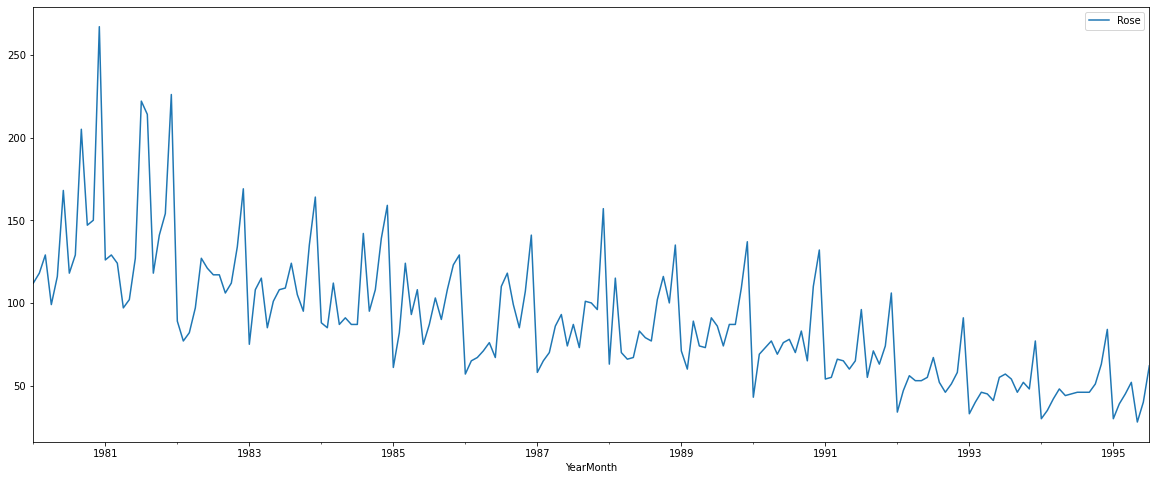

In [16]:
df2.fillna(method='bfill', inplace=True)
df2.plot()
plt.show()

In [17]:
df2.isnull().sum()

Rose    0
dtype: int64

In [18]:
df2.describe()

,Rose
count,187.000000
mean,89.919786
std,39.232269
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [19]:
type(df1)

pandas.core.frame.DataFrame

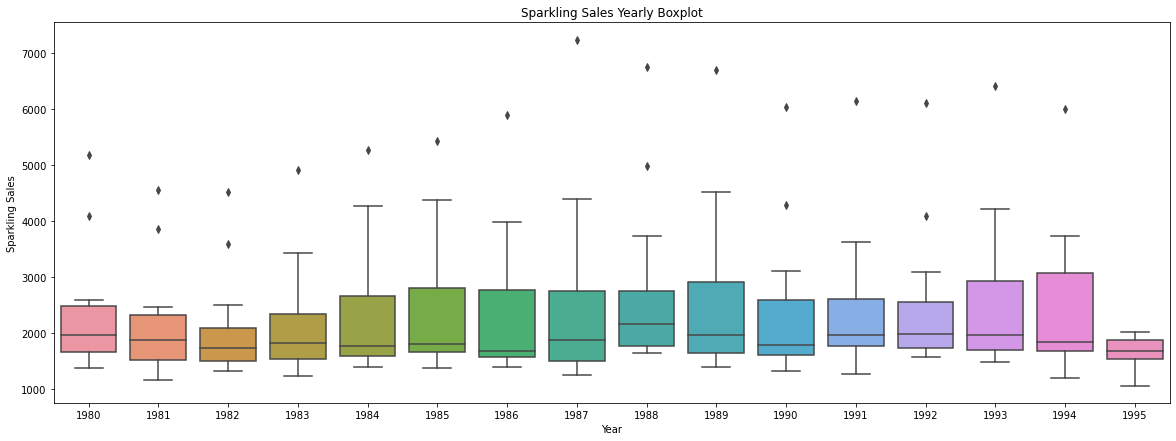

In [20]:
my_series = df1.squeeze()
fig, ax = plt.subplots(figsize=(20,7))
gfg = sns.boxplot(x = my_series.index.year, 
                y = my_series, ax = ax);
gfg.set(xlabel ="Year", ylabel = "Sparkling Sales", title ='Sparkling Sales Yearly Boxplot');

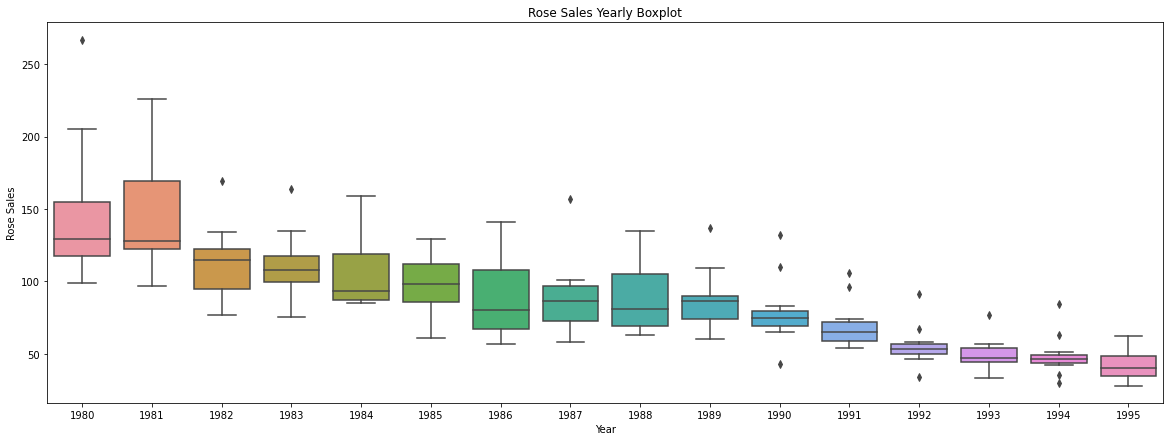

In [21]:
my_series1 = df2.squeeze()
fig, ax = plt.subplots(figsize=(20,7))
gfg1 = sns.boxplot(x = my_series1.index.year, 
                y = my_series1, ax = ax);
gfg1.set(xlabel ="Year", ylabel = "Rose Sales", title ='Rose Sales Yearly Boxplot');

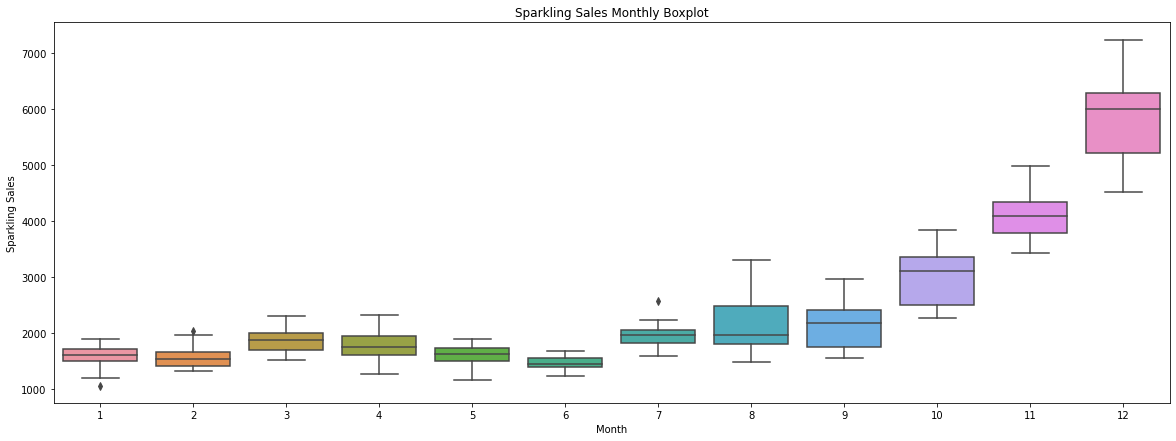

In [22]:
fig, ax = plt.subplots(figsize=(20,7))
gfg = sns.boxplot(x = my_series.index.month, 
                y = my_series, ax = ax);
gfg.set(xlabel ="Month", ylabel = "Sparkling Sales", title ='Sparkling Sales Monthly Boxplot');

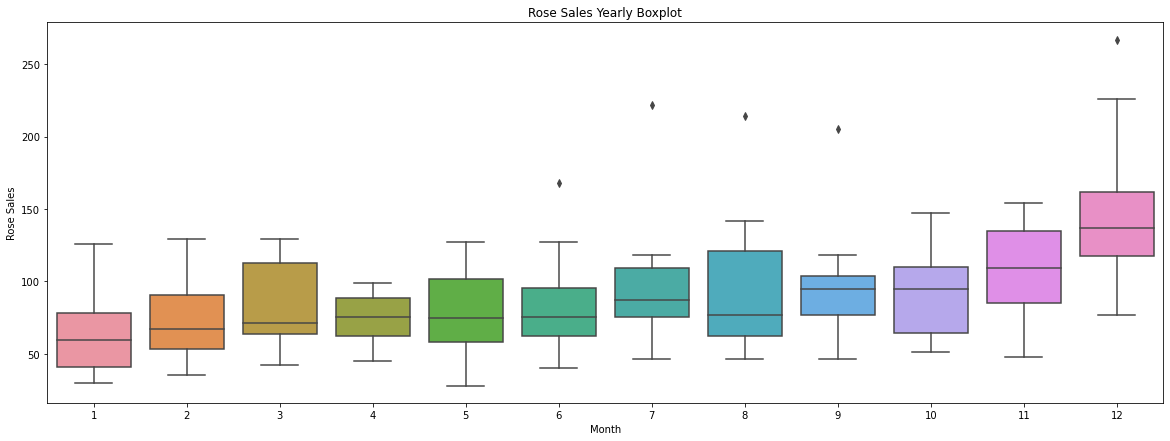

In [23]:
fig, ax = plt.subplots(figsize=(20,7))
gfg1 = sns.boxplot(x = my_series1.index.month, 
                y = my_series1, ax = ax);
gfg1.set(xlabel ="Month", ylabel = "Rose Sales", title ='Rose Sales Yearly Boxplot');

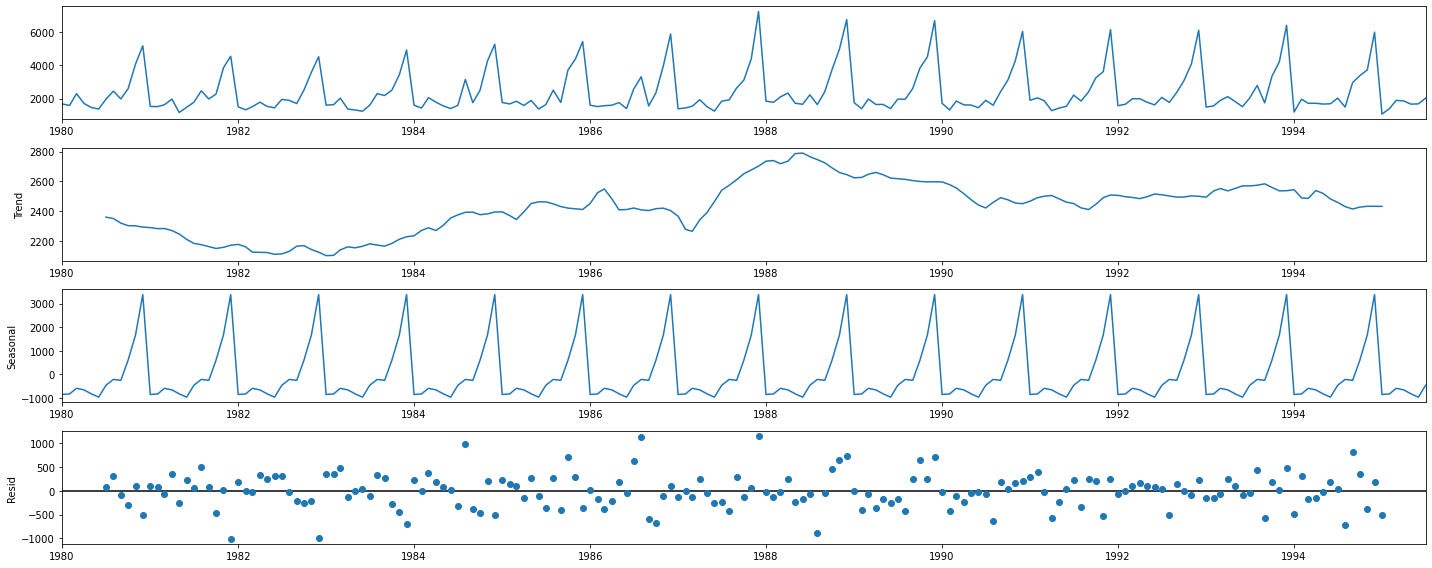

In [24]:
#Additive decomposition
df1_add_decompose = seasonal_decompose(df1, model = 'additive')
df1_add_decompose.plot()
plt.show()

In [25]:
df1_add_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [26]:
df1_add_decompose.seasonal

YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
                 ...    
1995-03-01   -592.356630
1995-04-01   -658.490559
1995-05-01   -824.416154
1995-06-01   -967.434011
1995-07-01   -465.502265
Name: seasonal, Length: 187, dtype: float64

In [27]:
df1_add_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

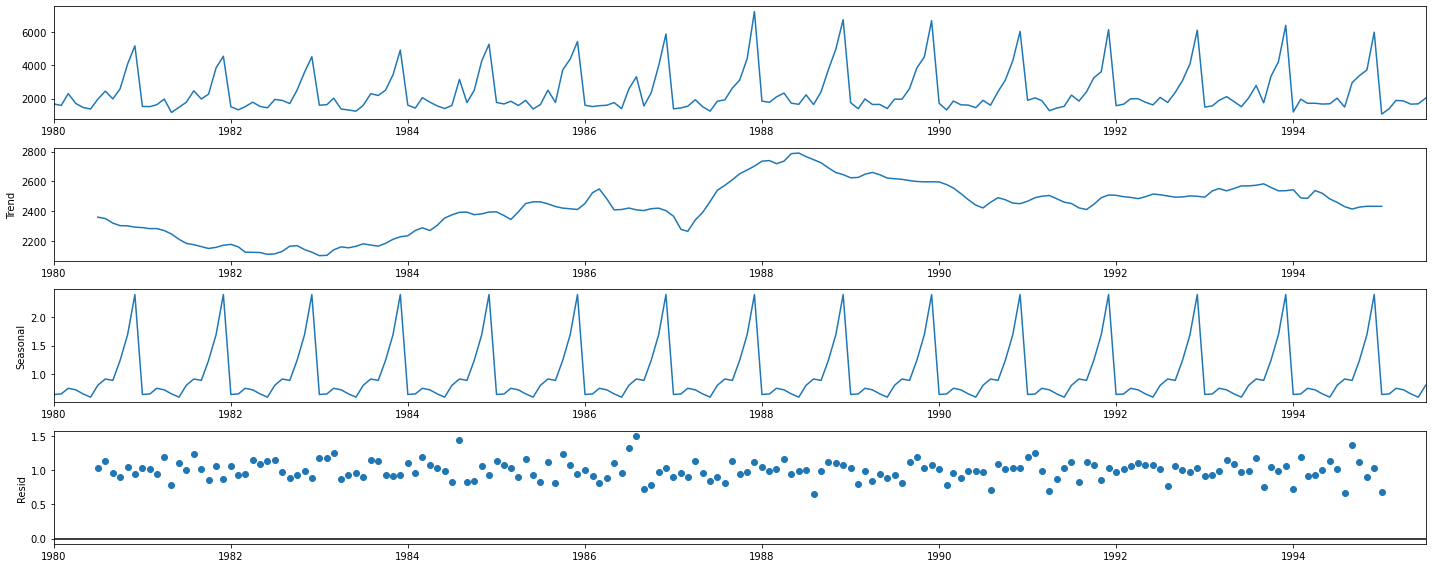

In [28]:
#Multiplicative decomposition
df1_mul_decompose = seasonal_decompose(df1, model = 'multiplicative')
df1_mul_decompose.plot()
plt.show()

In [29]:
df1_mul_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [30]:
df1_mul_decompose.seasonal

YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64

In [31]:
df1_mul_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

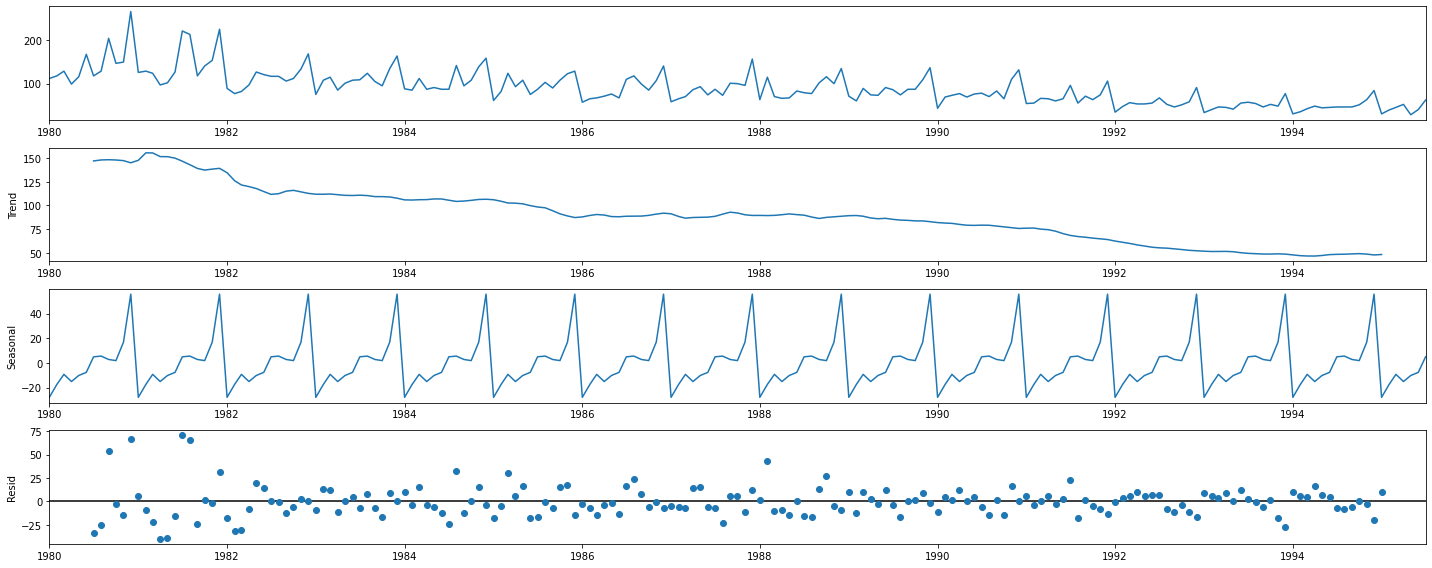

In [32]:
#Additive decomposition
df2_add_decompose = seasonal_decompose(df2, model = 'additive')
df2_add_decompose.plot()
plt.show()

In [33]:
df2_add_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [34]:
df2_add_decompose.seasonal

YearMonth
1980-01-01   -27.914120
1980-02-01   -17.440509
1980-03-01    -9.291700
1980-04-01   -15.104200
1980-05-01   -10.202414
                ...    
1995-03-01    -9.291700
1995-04-01   -15.104200
1995-05-01   -10.202414
1995-06-01    -7.684557
1995-07-01     4.935880
Name: seasonal, Length: 187, dtype: float64

In [35]:
df2_add_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

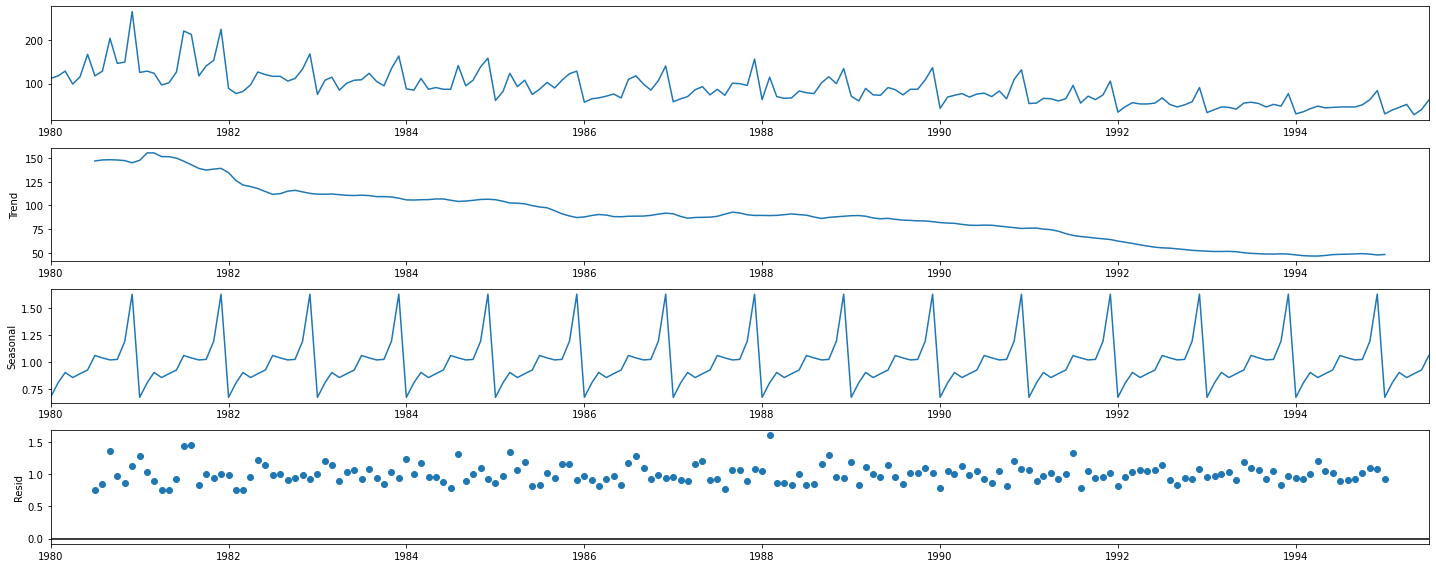

In [36]:
#Multiplicative decomposition
df2_mul_decompose = seasonal_decompose(df2, model = 'multiplicative')
df2_mul_decompose.plot()
plt.show()

#### Q3  Split the data into training and test. The test data should start in 1991.

In [37]:
train_spark = df1[df1.index<'1991'] 
test_spark  = df1[df1.index>='1991']

In [38]:
train_spark.shape

(132, 1)

In [39]:
test_spark.shape

(55, 1)

In [40]:
train_rose = df2[df2.index<'1991'] 
test_rose  = df2[df2.index>='1991']

In [41]:
train_rose.shape

(132, 1)

In [42]:
test_rose.shape

(55, 1)

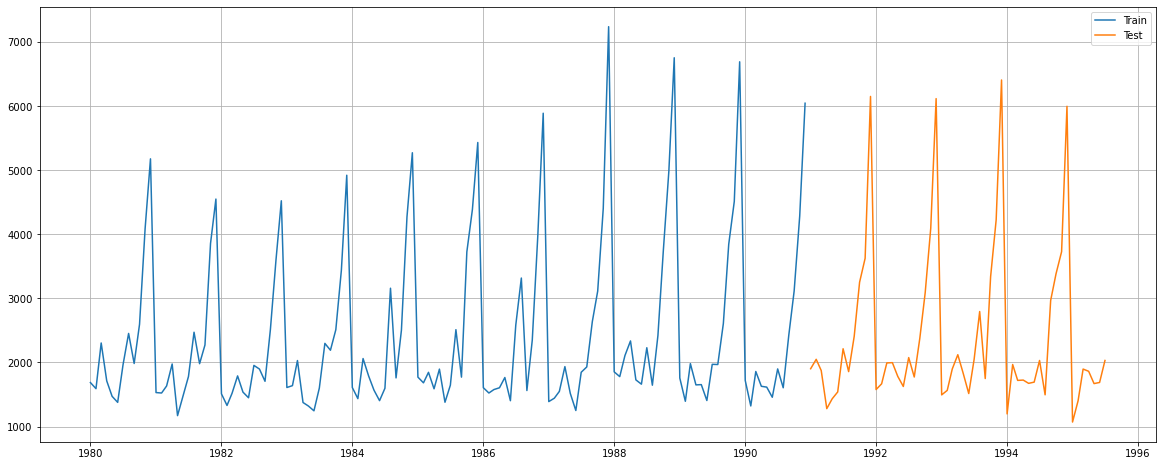

In [43]:
plt.plot(train_spark, label='Train')
plt.plot(test_spark, label='Test')
plt.legend(loc='best')
plt.grid()

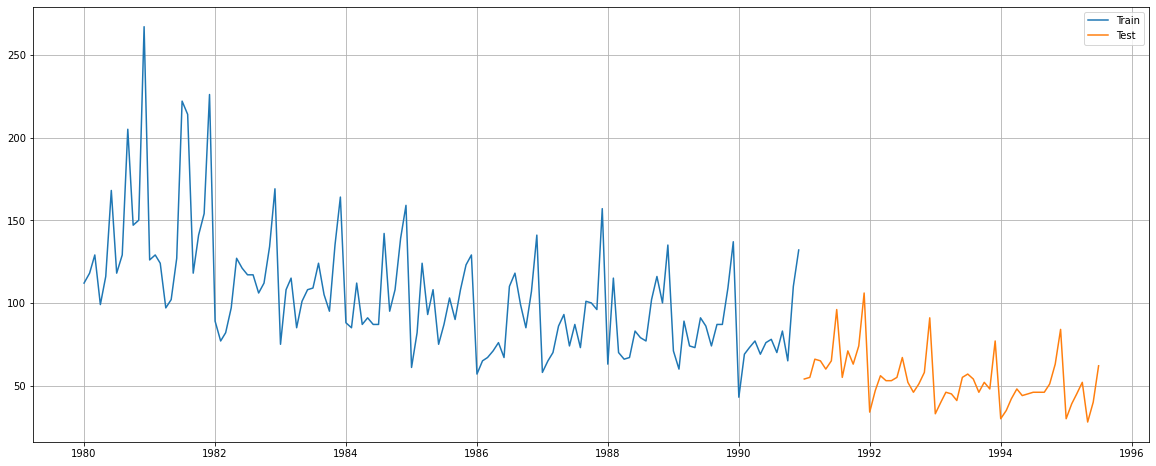

In [44]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.legend(loc='best')
plt.grid()

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [46]:
def do_something(train, test, key):
    
    # Model 1: Linear Regression Model
    train_time = [i+1 for i in range(len(train))]
    test_time = [i+133 for i in range(len(test))]
    
    LinearRegression_train = train.copy()
    LinearRegression_test = test.copy()
    
    LinearRegression_train['time'] = train_time
    LinearRegression_test['time'] = test_time
    
    lr = LinearRegression()
    lr.fit(LinearRegression_train[['time']],LinearRegression_train[key])
    
    train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
    LinearRegression_train['RegOnTime'] = train_predictions_model1
    
    test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
    LinearRegression_test['RegOnTime'] = test_predictions_model1
    
    rmse_model1_test = metrics.mean_squared_error(test[key],test_predictions_model1,squared=False)
    
    resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
    
    # Model 2: Naive Approach
    NaiveModel_train = train.copy()
    NaiveModel_test = test.copy()
    
    NaiveModel_test['naive'] = np.asarray(train[key])[len(np.asarray(train[key]))-1]
    NaiveModel_test['naive'].head()
    
    rmse_model2_test = metrics.mean_squared_error(test[key],NaiveModel_test['naive'],squared=False)
    
    resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
    resultsDf = pd.concat([resultsDf, resultsDf_2])
    
    # Model 3: Simple Average
    SimpleAverage_train = train.copy()
    SimpleAverage_test = test.copy()
    
    SimpleAverage_test['mean_forecast'] = train[key].mean()
    
    rmse_model3_test = metrics.mean_squared_error(test[key],SimpleAverage_test['mean_forecast'],squared=False)
    
    resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]} ,index=['SimpleAverageModel'])
    resultsDf = pd.concat([resultsDf, resultsDf_3])
    
    # Plot 
    plt.plot( train[key], label='Train')
    plt.plot(test[key], label='Test')
    plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression')
    plt.plot(NaiveModel_test['naive'], label='Naive Forecast')
    plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

    plt.legend(loc='best')
    plt.grid();
    
    return resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


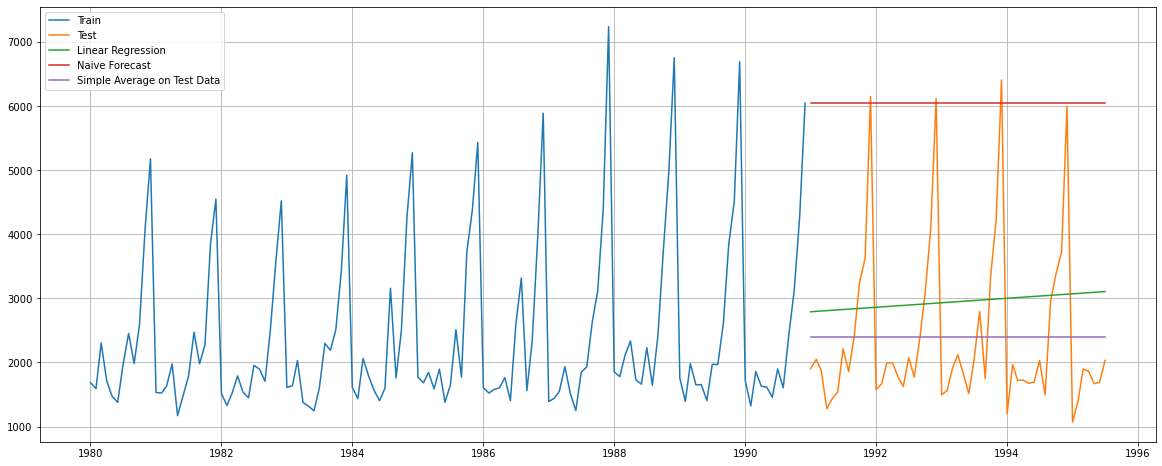

In [47]:
spark_res_df = do_something(train_spark, test_spark, 'Sparkling')
spark_res_df

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426


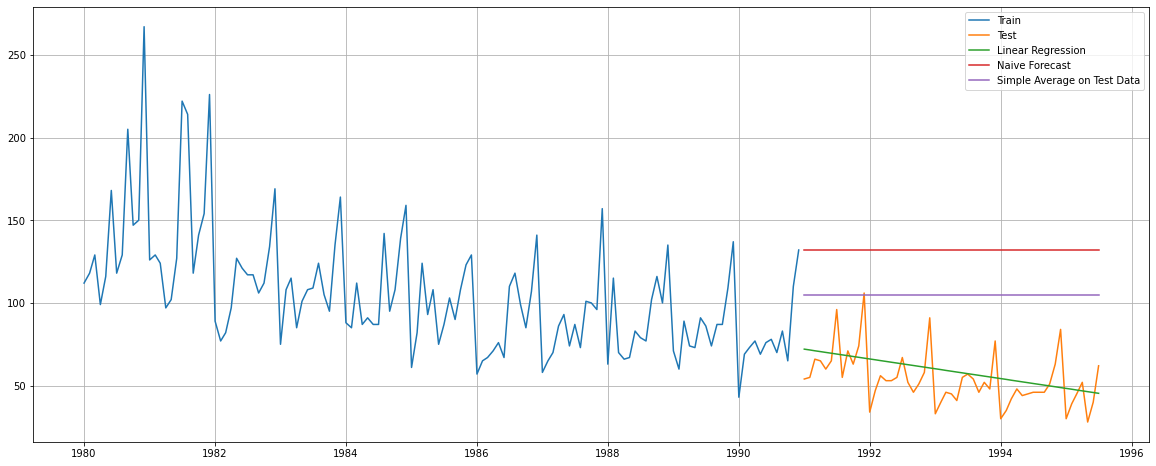

In [48]:
rose_res_df = do_something(train_rose, test_rose, 'Rose')
rose_res_df

In [49]:
def moving_averages(df, key, test):
    MovingAverage = df.copy()
    
    MovingAverage['Trailing_2'] = MovingAverage[key].rolling(2).mean()
    MovingAverage['Trailing_4'] = MovingAverage[key].rolling(4).mean()
    MovingAverage['Trailing_6'] = MovingAverage[key].rolling(6).mean()
    MovingAverage['Trailing_9'] = MovingAverage[key].rolling(9).mean()
    
    #Creating train and test set 
    trailing_MovingAverage_train=MovingAverage[0:132] 
    trailing_MovingAverage_test=MovingAverage[132:]
    
    plt.plot(trailing_MovingAverage_train[key], label='Train')
    plt.plot(trailing_MovingAverage_test[key], label='Test')


    plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
    plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
    plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
    plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

    plt.legend(loc = 'best')
    plt.grid();
    
    rmse_model4_test_2 = metrics.mean_squared_error(test[key],trailing_MovingAverage_test['Trailing_2'],squared=False)
    rmse_model4_test_4 = metrics.mean_squared_error(test[key],trailing_MovingAverage_test['Trailing_4'],squared=False)
    rmse_model4_test_6 = metrics.mean_squared_error(test[key],trailing_MovingAverage_test['Trailing_6'],squared=False)
    rmse_model4_test_9 = metrics.mean_squared_error(test[key],trailing_MovingAverage_test['Trailing_9'],squared=False)
    
    resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
    
    return resultsDf_4

,Test RMSE
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


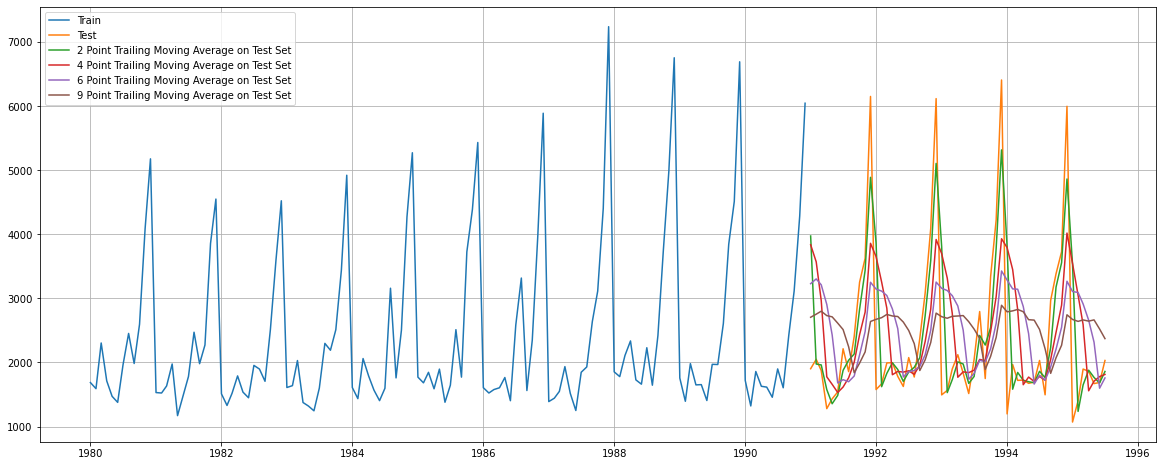

In [50]:
ma_spark = moving_averages(df1,'Sparkling', test_spark)
ma_spark

In [51]:
spark_res_df = pd.concat([spark_res_df, ma_spark])
spark_res_df

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


,Test RMSE
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503


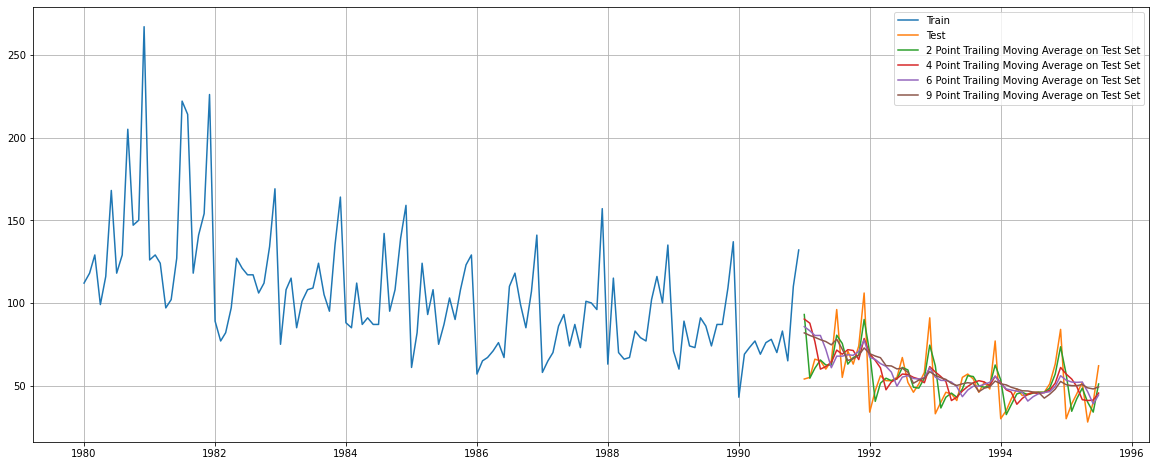

In [52]:
ma_rose = moving_averages(df2,'Rose', test_rose)
ma_rose

In [53]:
rose_res_df = pd.concat([rose_res_df, ma_rose])
rose_res_df

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503


In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em

In [55]:
def exponential_smoothening(train, test ):
    # Simple Exponential Smoothing
    model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
    model_SES_autofit = model_SES.fit(optimized=True)
    
    print("Single Exponential Smoothing params : ",model_SES_autofit.params)
    
    SES_predict = model_SES_autofit.forecast(steps=len(test))
    
    resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Simple Exponential Smoothing'])
    
    
    # Double Exponential Smoothing
    model_DES = Holt(train,initialization_method='estimated')
    model_DES = model_DES.fit()
    
    print("Double Exponential Smoothing params : ",model_DES.params)
    DES_predict =  model_DES.forecast(len(test))
    
    resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])
    resultsDf = pd.concat([resultsDf, resultsDf_temp])
    
    # Triple Exponential Smoothening With Additive Seasonality
    model_TES = ExponentialSmoothing(train, trend='additive',seasonal='additive',initialization_method='estimated')
    model_TES = model_TES.fit()
    
    print("Triple Exponential Smoothening With Additive Seasonality : ",model_TES.params)
    TES_predict =  model_TES.forecast(len(test))
    
    resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES With Additive Seasonality'])

    resultsDf = pd.concat([resultsDf, resultsDf_temp])
    
    # Triple Exponential Smoothening With Multiplicative Seasonality
    model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
    model_TES_am = model_TES_am.fit()
    
    print("Triple Exponential Smoothening With Multiplicative Seasonality : ",model_TES_am.params)
    
    TES_predict_am =  model_TES_am.forecast(len(test))
    
    resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES With Multiplicative Seasonality'])

    resultsDf = pd.concat([resultsDf, resultsDf_temp])
  
    
    # Forecast Plot
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')

    plt.plot(SES_predict, label='SES predictions on Test Set')
    plt.plot(DES_predict, label='DES predictions on Test Set')
    plt.plot(TES_predict, label='TES With Additive Seasonality predictions on Test Set')
    plt.plot(TES_predict_am, label='TES With Multiplicative Seasonality predictions on Test Set')

    plt.legend(loc='best')
    plt.grid();
    
    return resultsDf
    

Single Exponential Smoothing params :  {'smoothing_level': 0.07029120765764557, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1764.0137060346985, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Double Exponential Smoothing params :  {'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Triple Exponential Smoothening With Additive Seasonality :  {'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -

,Test RMSE
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833
TES With Additive Seasonality,378.951023
TES With Multiplicative Seasonality,404.286809


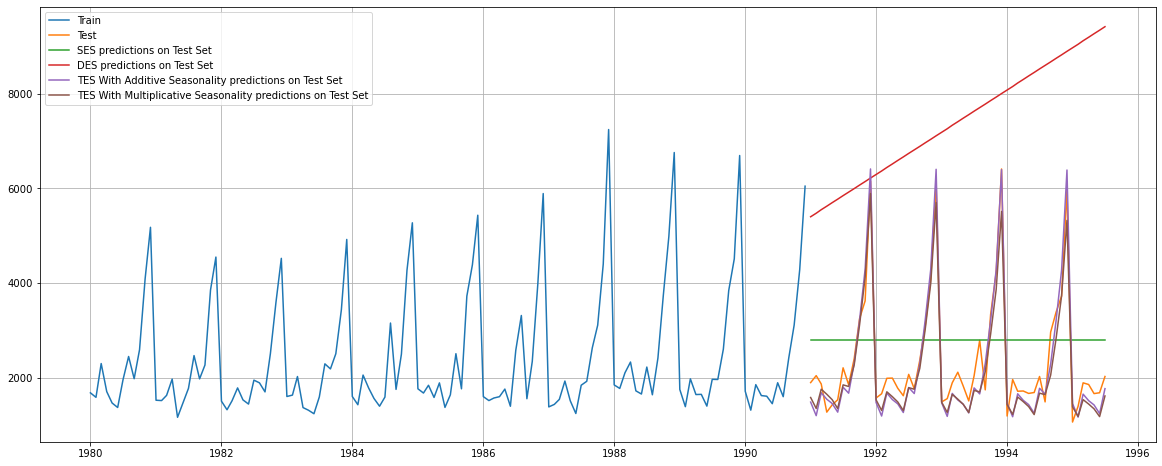

In [56]:
es_spark = exponential_smoothening(train_spark, test_spark)
es_spark

In [57]:
spark_res_df = pd.concat([spark_res_df, es_spark])
spark_res_df

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833
TES With Additive Seasonality,378.951023


Single Exponential Smoothing params :  {'smoothing_level': 0.09874983698117956, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 134.38702481818487, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Double Exponential Smoothing params :  {'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Triple Exponential Smoothening With Additive Seasonality :  {'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.748398

,Test RMSE
Simple Exponential Smoothing,36.775787
Double Exponential Smoothing,15.262498
TES With Additive Seasonality,14.237386
TES With Multiplicative Seasonality,20.132468


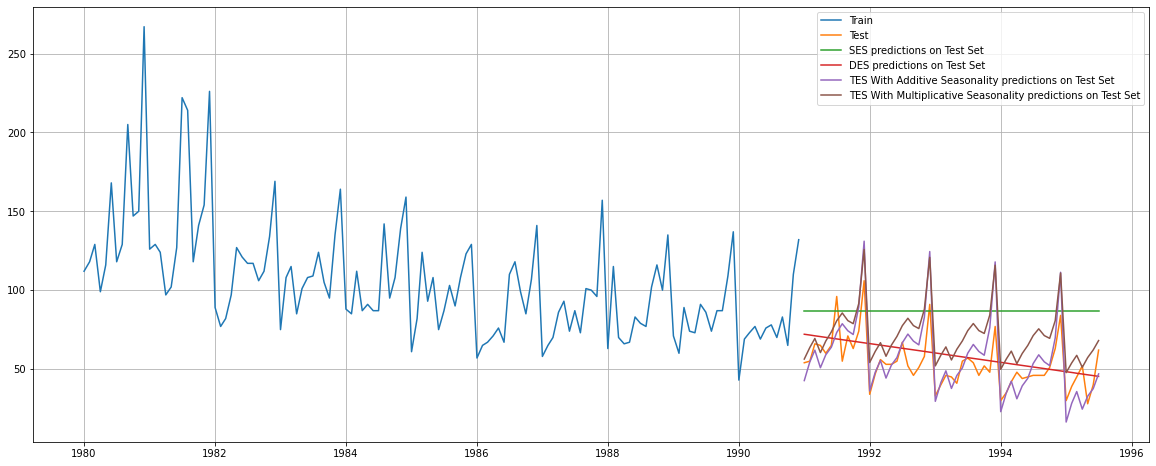

In [58]:
es_rose = exponential_smoothening(train_rose, test_rose)
es_rose

In [59]:
rose_res_df = pd.concat([rose_res_df, es_rose])
rose_res_df

,Test RMSE
RegressionOnTime,15.262509
NaiveModel,79.699093
SimpleAverageModel,53.440426
2pointTrailingMovingAverage,11.529409
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
Simple Exponential Smoothing,36.775787
Double Exponential Smoothing,15.262498
TES With Additive Seasonality,14.237386


In [60]:
rose_res_df.sort_values('Test RMSE', inplace=True)
rose_res_df

,Test RMSE
2pointTrailingMovingAverage,11.529409
TES With Additive Seasonality,14.237386
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
Double Exponential Smoothing,15.262498
RegressionOnTime,15.262509
TES With Multiplicative Seasonality,20.132468
Simple Exponential Smoothing,36.775787
SimpleAverageModel,53.440426


In [61]:
spark_res_df.sort_values('Test RMSE', inplace=True)
spark_res_df

,Test RMSE
TES With Additive Seasonality,378.951023
TES With Multiplicative Seasonality,404.286809
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
Simple Exponential Smoothing,1338.008384
9pointTrailingMovingAverage,1346.278315
RegressionOnTime,1389.135175
NaiveModel,3864.279352


#### Q5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [62]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression='ct')
    print("p-value is : ",dftest[1])
    

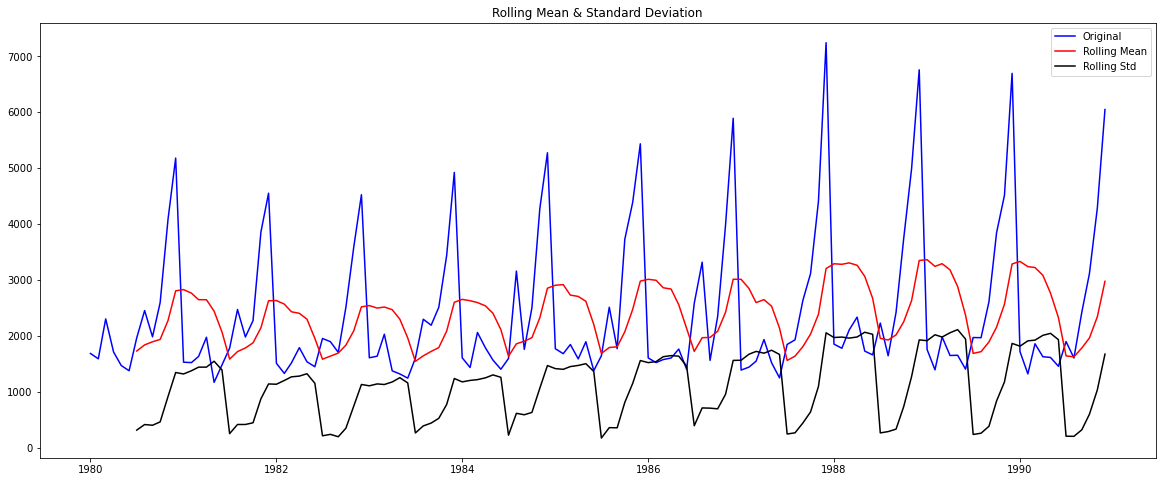

Results of Dickey-Fuller Test:
p-value is :  0.5674110388593686


In [63]:
test_stationarity(train_spark)

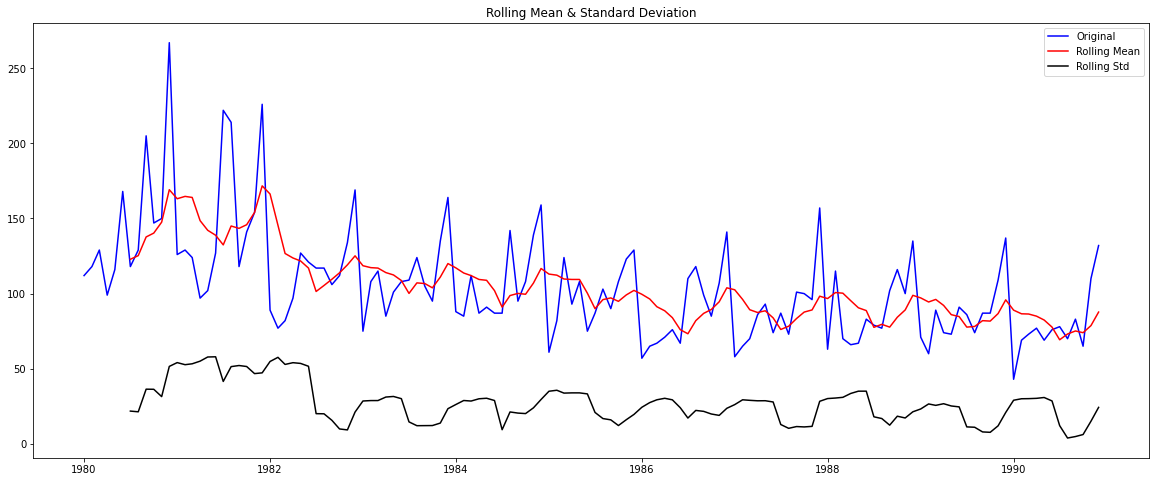

Results of Dickey-Fuller Test:
p-value is :  0.7569093051047063


In [64]:
test_stationarity(train_rose)

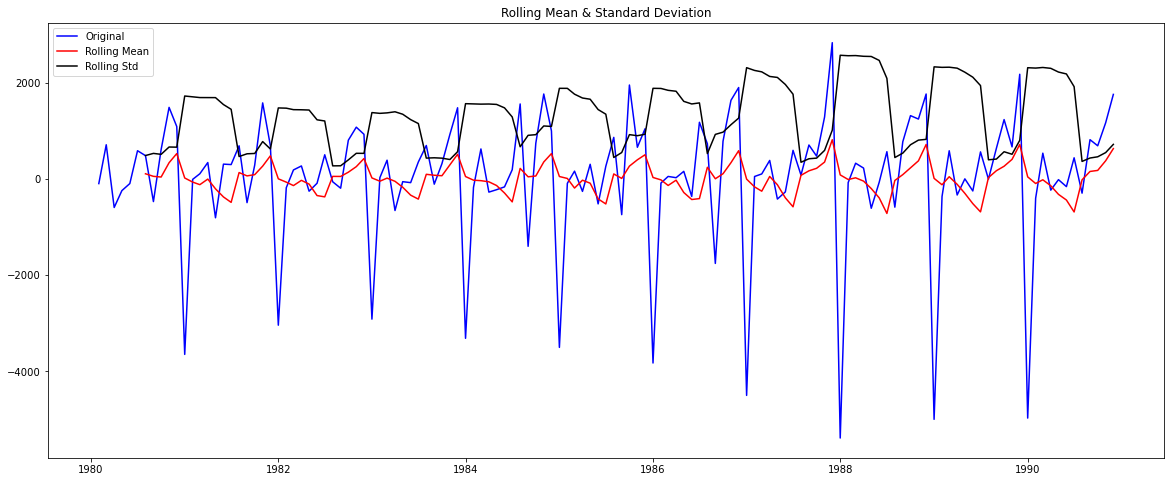

Results of Dickey-Fuller Test:
p-value is :  8.479210655514366e-11


In [65]:
test_stationarity(train_spark.diff().dropna())

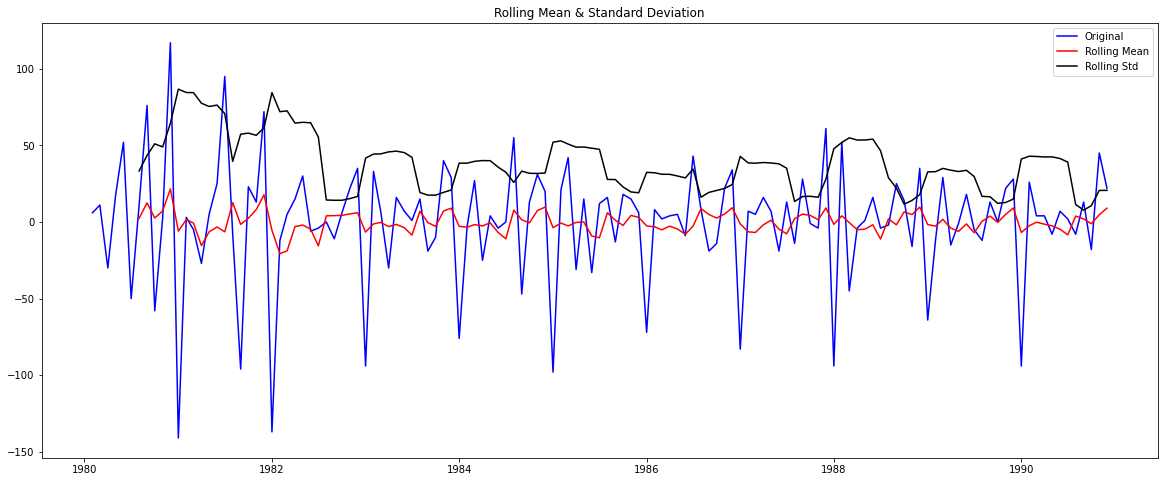

Results of Dickey-Fuller Test:
p-value is :  3.8948313567816136e-08


In [66]:
test_stationarity(train_rose.diff().dropna())

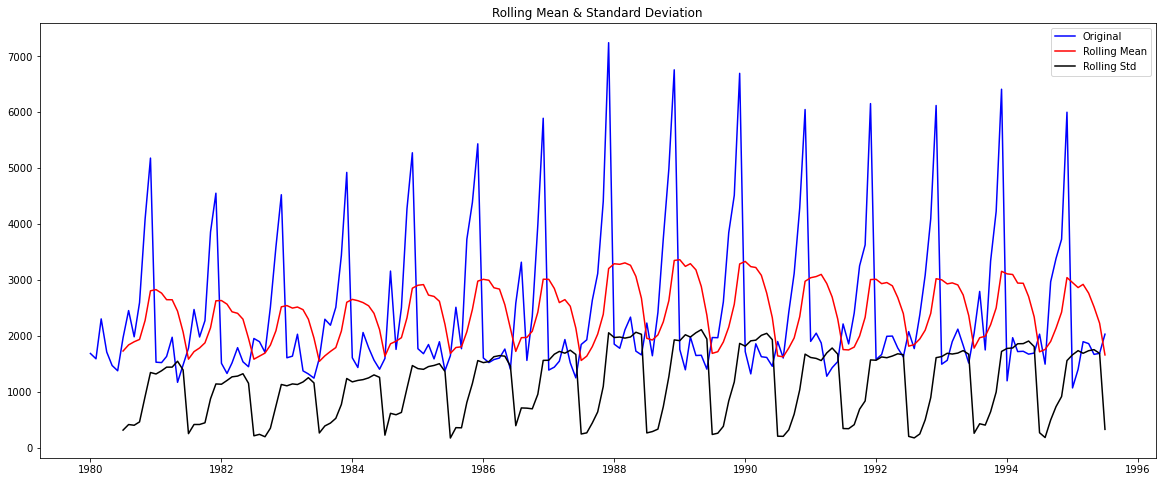

Results of Dickey-Fuller Test:
p-value is :  0.7055958459932753


In [67]:
test_stationarity(df1)

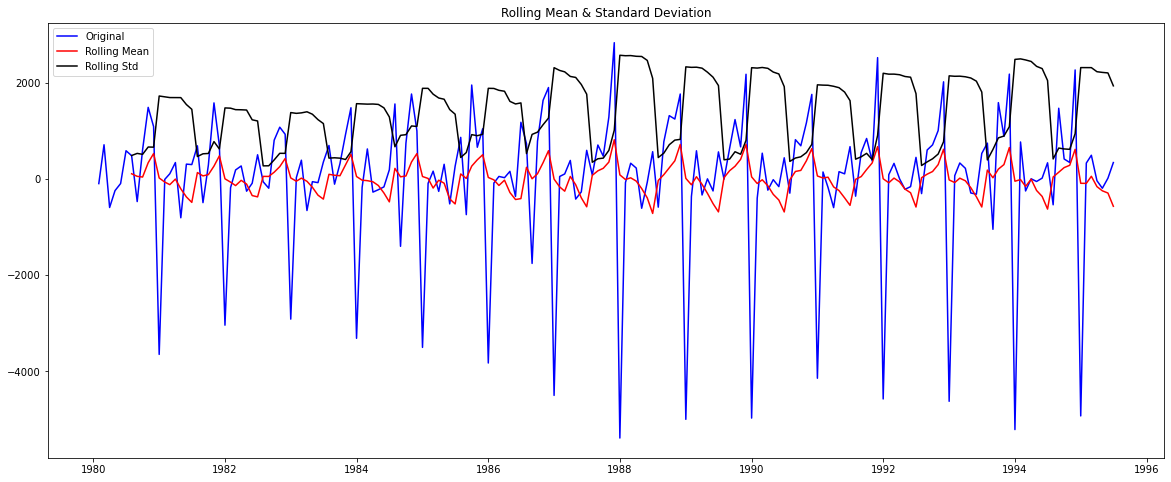

Results of Dickey-Fuller Test:
p-value is :  0.0


In [68]:
test_stationarity(df1.diff().dropna())

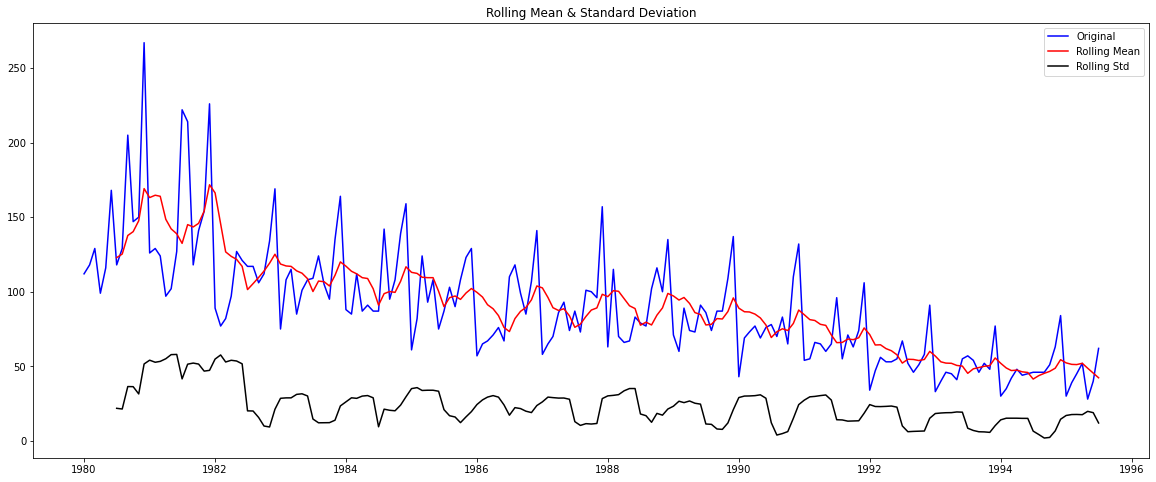

Results of Dickey-Fuller Test:
p-value is :  0.46692256831407086


In [69]:
test_stationarity(df2)

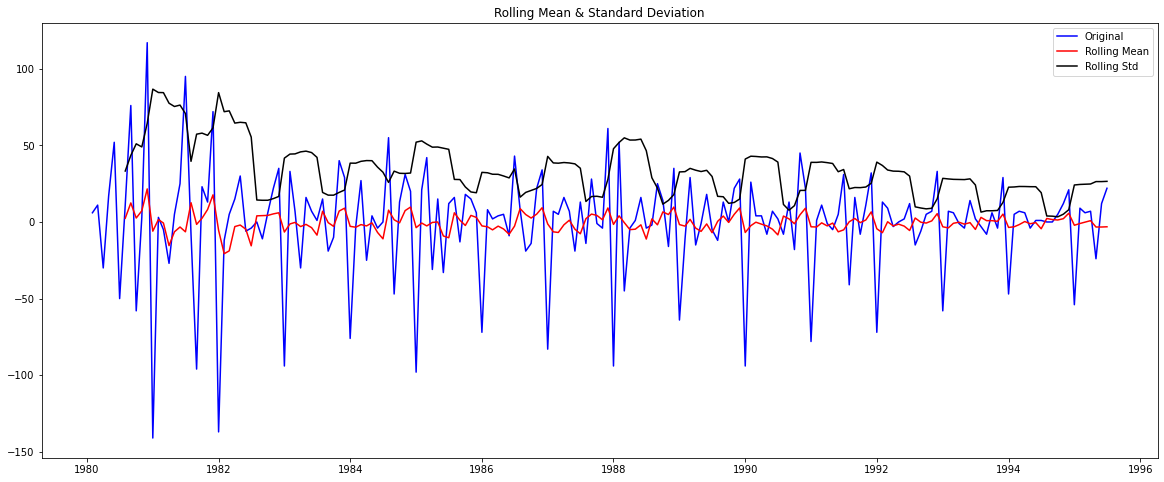

Results of Dickey-Fuller Test:
p-value is :  3.008267457871187e-11


In [70]:
test_stationarity(df2.diff().dropna())

#### Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [71]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [72]:
def build_arima(train, key):
    p = q = range(0, 3)
    d= range(1,2)
    pdq = list(itertools.product(p, d, q))
    
    ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
    
    for param in pdq:
        ARIMA_model = ARIMA(train[key].values,order=param).fit()
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
        
    ARIMA_AIC.sort_values(by='AIC',ascending=True, inplace=True)
    
    return ARIMA_AIC
        
        


In [73]:
build_arima(train_spark,'Sparkling')

,param,AIC
8,"(2, 1, 2)",2210.618562
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906439
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [74]:
def auto_Arima(train, key, param, test):
    auto_ARIMA = ARIMA(train[key], order=param)
    results_auto_ARIMA = auto_ARIMA.fit()
    print(results_auto_ARIMA.summary())
    
    predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
    
    rmse = metrics.mean_squared_error(test[key],predicted_auto_ARIMA[0],squared=False)
    
    return pd.DataFrame({'RMSE': [rmse]},index=['ARIMA'+str(param)+'-AIC'])

    

In [75]:
auto_arima_sp_df = auto_Arima(train_spark,'Sparkling', (2, 1, 2), test_spark)
auto_arima_sp_df

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.730
Date:                Wed, 06 Jul 2022   AIC                           2210.619
Time:                        20:46:09   BIC                           2227.870
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.518     10.790      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2700      0.074     17.048      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

,RMSE
"ARIMA(2, 1, 2)-AIC",1374.546024


In [76]:
build_arima(train_rose,'Rose')

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359229
4,"(1, 1, 1)",1277.775753
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [77]:
auto_arima_ro_df = auto_Arima(train_rose,'Rose', (0, 1, 2), test_rose)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 06 Jul 2022   AIC                           1276.835
Time:                        20:46:11   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4886      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [78]:
########## 2 ARIMA dataframes

In [79]:
auto_arima_sp_df

,RMSE
"ARIMA(2, 1, 2)-AIC",1374.546024


In [80]:
auto_arima_ro_df

,RMSE
"ARIMA(0, 1, 2)-AIC",15.611357


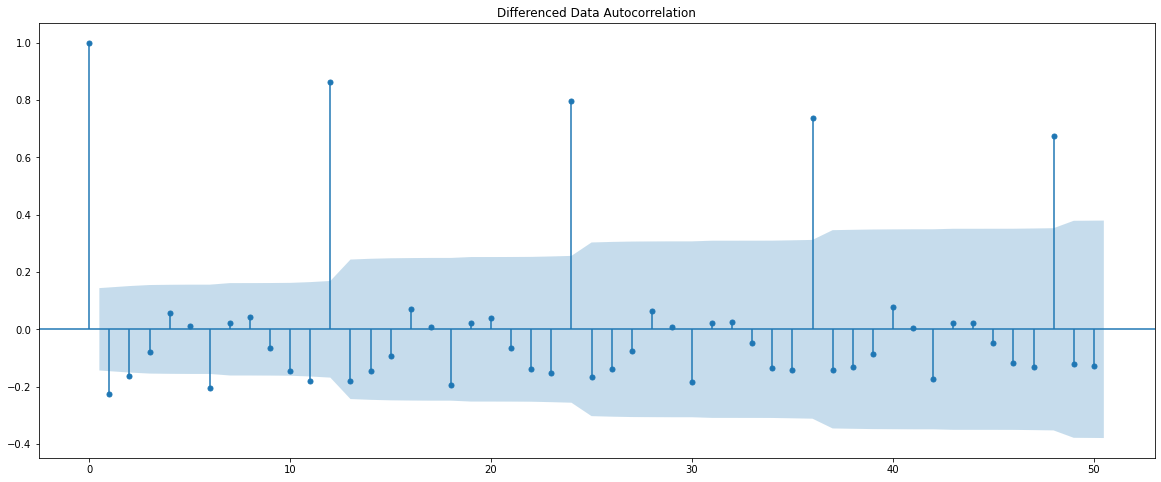

In [81]:
# We will Plot ACF plot to find the seasonality factor before proceeding with SARIMA model.
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [82]:
# From the above figure we observe the seasonality of 6 as well as 12. We will proceed with 12.

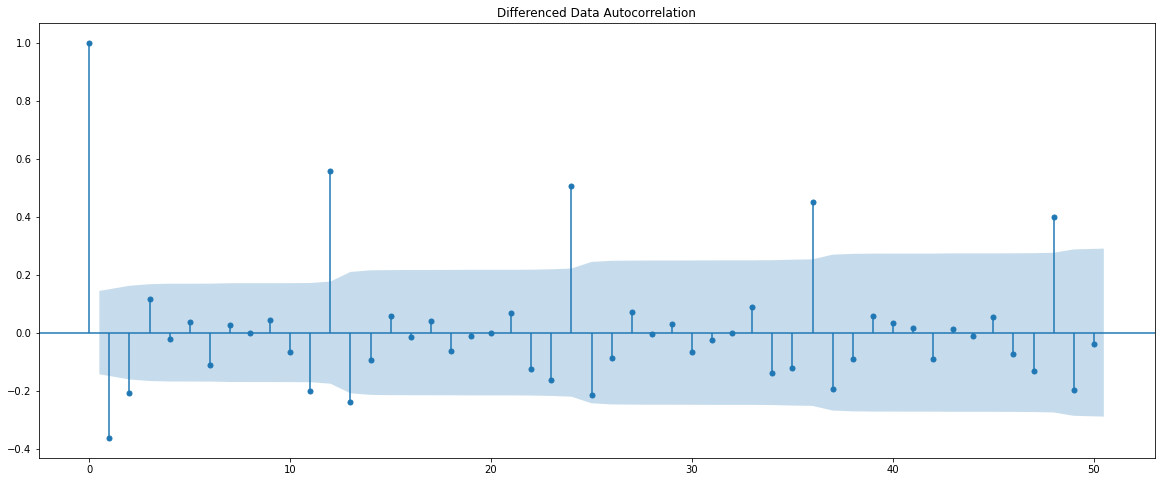

In [83]:
# We will Plot ACF plot to find the seasonality factor before proceeding with SARIMA model.
plot_acf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [84]:
# From the above figure we observe the seasonality of 6 as well as 12.

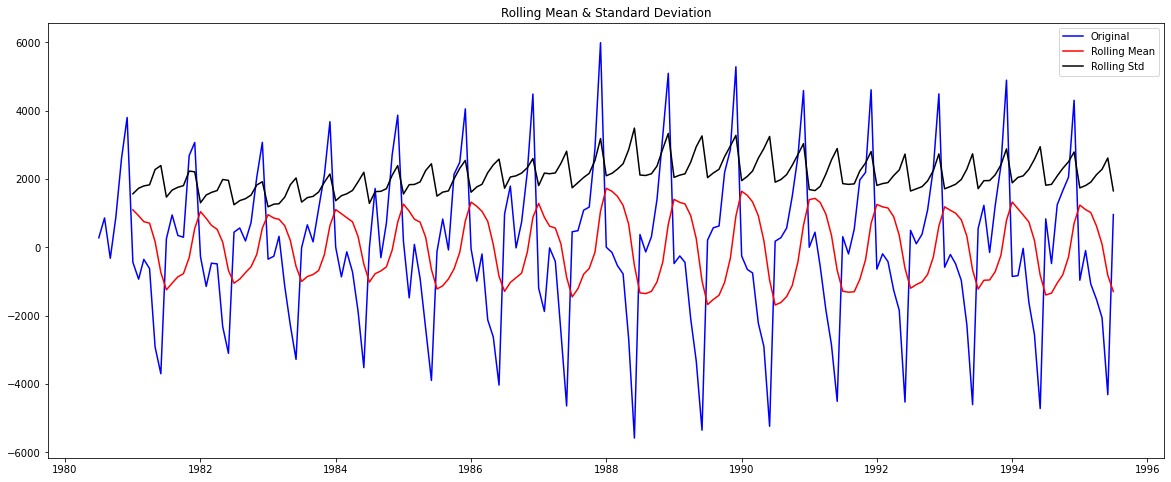

Results of Dickey-Fuller Test:
p-value is :  4.720421360314017e-18


In [85]:
# Since seasonal factor is 6. Lets check stationarity of data with difference level 6

test_stationarity(df1.diff(6).dropna())



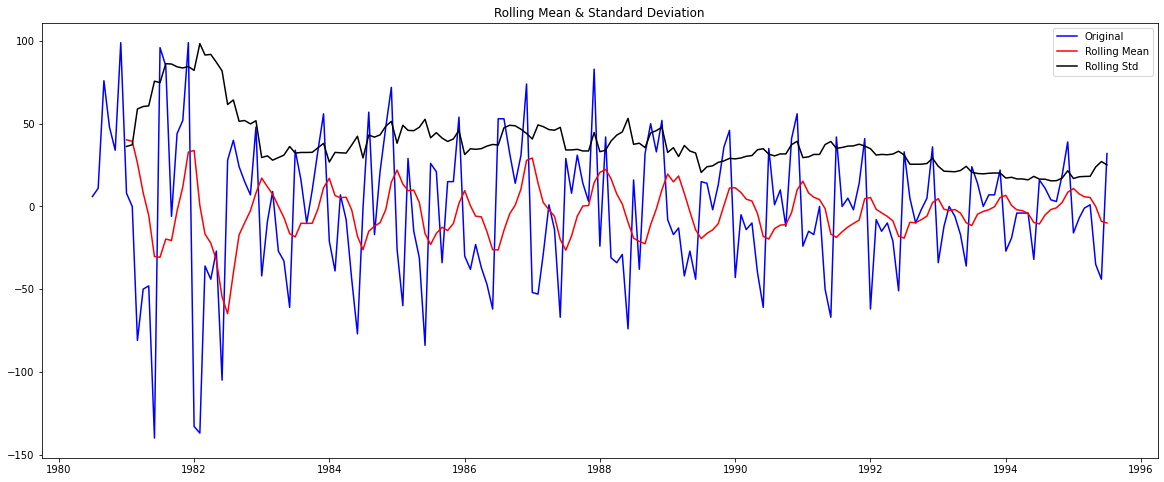

Results of Dickey-Fuller Test:
p-value is :  9.612362802591705e-14


In [86]:
# Since seasonal factor is 6. Lets check stationarity of data with difference level 6

test_stationarity(df2.diff(6).dropna())

In [87]:
import statsmodels.api as sm


def build_sarima(train, key ,seasonal):
    
    p = q = range(0, 3)
    d= range(1,2)
    D = range(0,1)
    pdq = list(itertools.product(p, d, q))
    model_pdq = [(x[0], x[1], x[2], seasonal) for x in list(itertools.product(p, D, q))]
    
    SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
    
    for param in pdq:
        for param_seasonal in model_pdq:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train[key].values,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            
            SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
            
    SARIMA_AIC.sort_values(by='AIC',ascending=True, inplace=True)
    
    return SARIMA_AIC
    
    
    

In [88]:
def auto_sarima(train, key, param, seasonal_param, test):
    auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train[key].values,
                                order=param,
                                seasonal_order=seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
    print(results_auto_SARIMA_6.summary())
    
    results_auto_SARIMA_6.plot_diagnostics()
    plt.show()
    
    predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
    
    rmse = metrics.mean_squared_error(test[key],predicted_auto_SARIMA_6.predicted_mean,squared=False)
    
    return pd.DataFrame({'RMSE': [rmse]} ,index=['SARIMA' + str(param) + str(seasonal_param)+ '-AIC'])

In [89]:
build_sarima(train_spark, 'Sparkling', 6).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888805
53,"(1, 1, 2)","(2, 0, 2, 6)",1729.938537
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703672
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379779
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040750


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Wed, 06 Jul 2022   AIC                           1727.889
Time:                                   20:47:03   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0976      0.112     -0.871

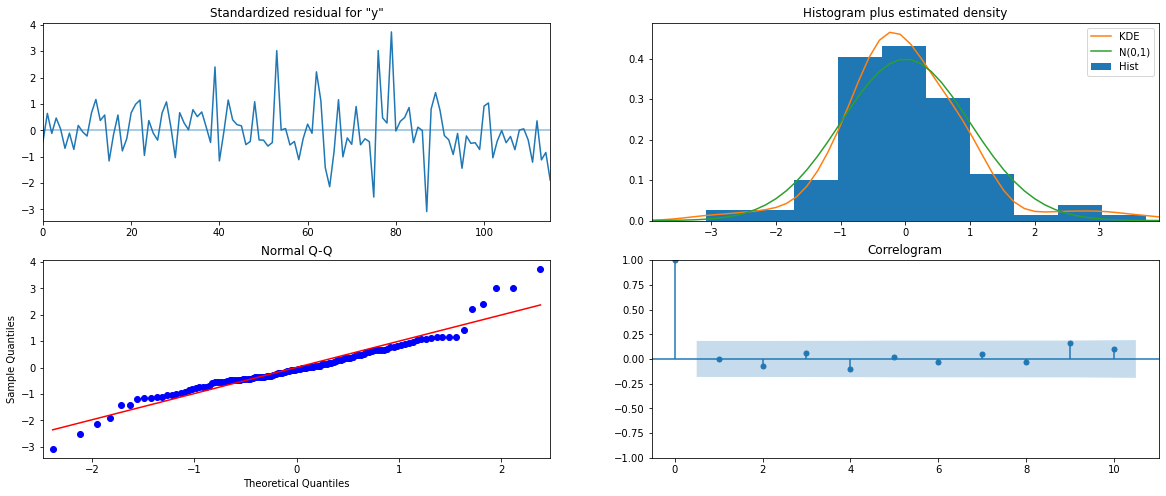

In [90]:
spark_df = auto_sarima(train_spark, 'Sparkling',(0, 1, 2), (2, 0, 2, 6), test_spark )

In [91]:
spark_df = pd.concat([spark_df, auto_arima_sp_df])
spark_df

,RMSE
"SARIMA(0, 1, 2)(2, 0, 2, 6)-AIC",601.122857
"ARIMA(2, 1, 2)-AIC",1374.546024


In [92]:
build_sarima(train_rose, 'Rose', 6).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220368
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Wed, 06 Jul 2022   AIC                           1041.656
Time:                                   20:47:30   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.152     -3.900      0.000      -0.892      -0.295
ma.L1         -0.1954    939.337     -0.000

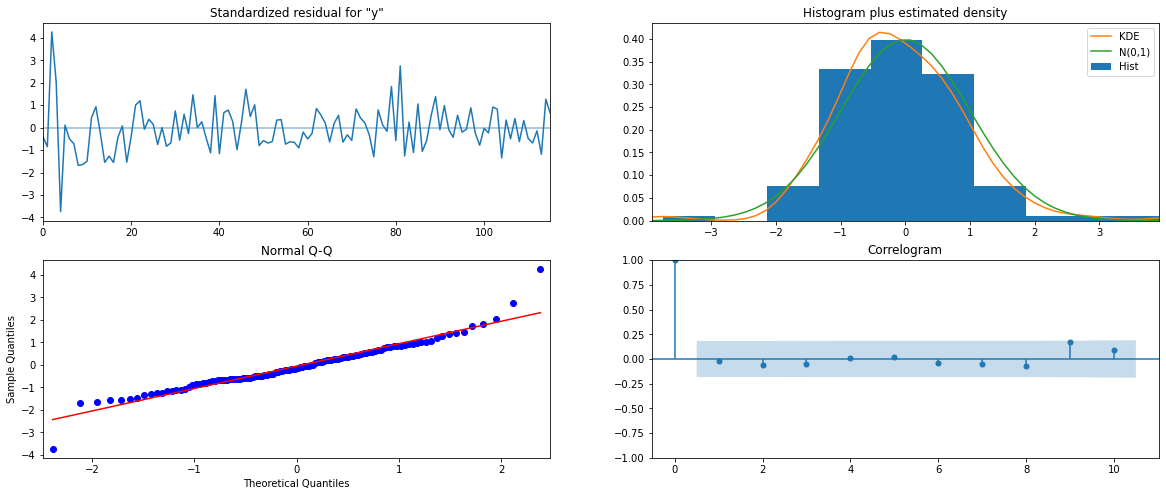

In [93]:
rose_df = auto_sarima(train_rose, 'Rose',(1, 1, 2), (2, 0, 2, 6), test_rose )

In [94]:
rose_df = pd.concat([rose_df, auto_arima_ro_df])


In [95]:
################ 2 DF 
spark_df

,RMSE
"SARIMA(0, 1, 2)(2, 0, 2, 6)-AIC",601.122857
"ARIMA(2, 1, 2)-AIC",1374.546024


In [96]:
rose_df

,RMSE
"SARIMA(1, 1, 2)(2, 0, 2, 6)-AIC",26.111408
"ARIMA(0, 1, 2)-AIC",15.611357


#### Q7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

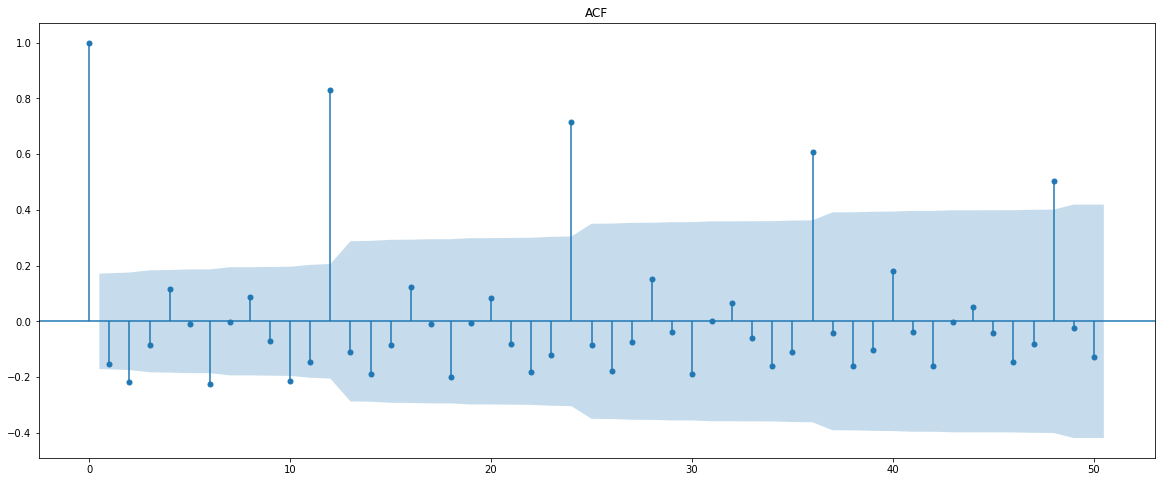

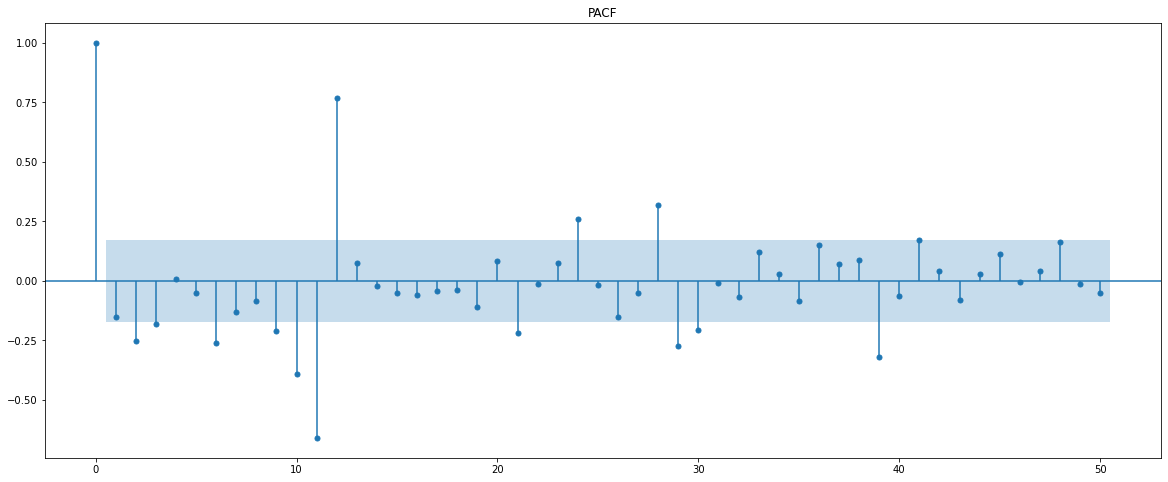

In [97]:
plot_acf(train_spark['Sparkling'].diff().dropna(),lags=50,title='ACF')
plot_pacf(train_spark['Sparkling'].diff().dropna(),lags=50,title='PACF')
plt.show()

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

In [98]:
def manual_arima(train, key, param, test):
    manual_ARIMA = ARIMA(train[key].astype('float64'), order=param)
    results_manual_ARIMA = manual_ARIMA.fit()
    print(results_manual_ARIMA.summary())
    
    predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
    
    rmse = metrics.mean_squared_error(test[key],predicted_manual_ARIMA[0],squared=False)
    
    return pd.DataFrame({'RMSE': [rmse]} ,index=['ARIMA' + str(param)+ '-Manual'])

In [99]:
man_sp = manual_arima(train_spark, 'Sparkling', (0, 1, 0), test_spark)
man_sp

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Wed, 06 Jul 2022   AIC                           2269.583
Time:                        20:47:31   BIC                           2275.333
Sample:                    02-01-1980   HQIC                          2271.919
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


,RMSE
"ARIMA(0, 1, 0)-Manual",4779.154299


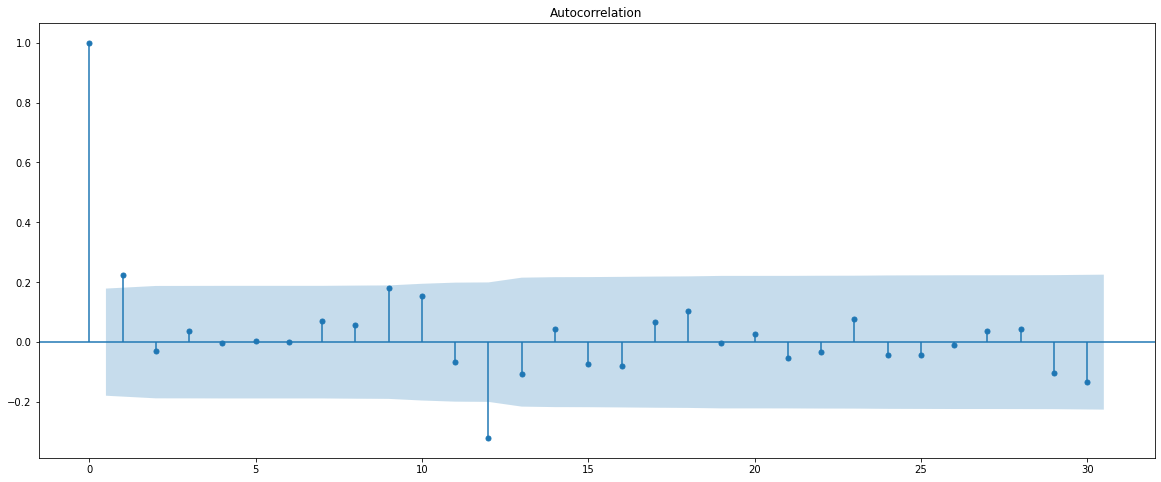

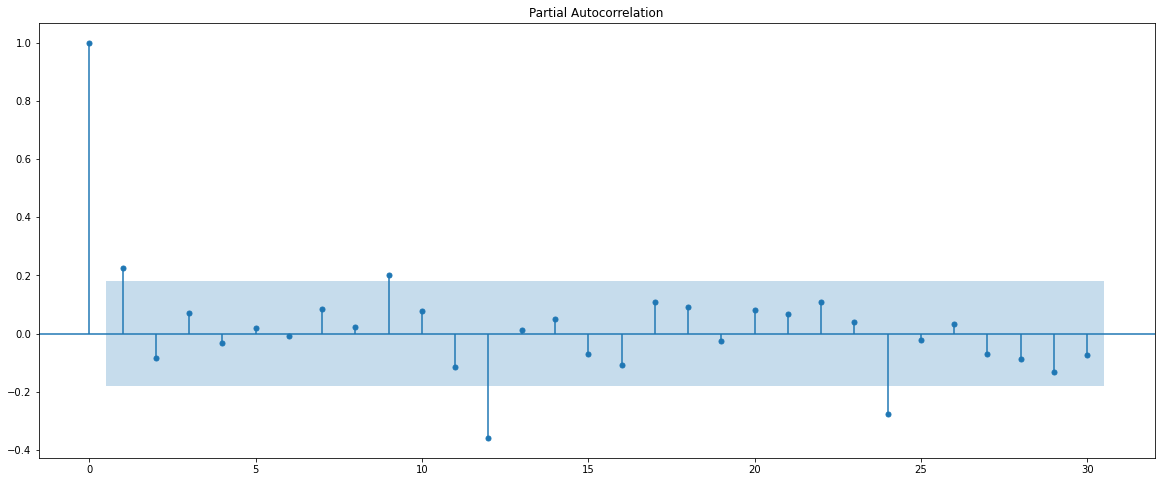

In [100]:
plot_acf((train_spark['Sparkling'].diff(12).dropna()).dropna(),lags=30)
plot_pacf((train_spark['Sparkling'].diff(12).dropna()).dropna(),lags=30);

In [101]:
def manual_sarima(train, key, param, seasonal_param, test):
    auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train[key].values,
                                order=param,
                                seasonal_order=seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
    print(results_auto_SARIMA_6.summary())
    
    results_auto_SARIMA_6.plot_diagnostics()
    plt.show()
    
    predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
    
    rmse = metrics.mean_squared_error(test[key],predicted_auto_SARIMA_6.predicted_mean,squared=False)
    
    return pd.DataFrame({'RMSE': [rmse]} ,index=['SARIMA' + str(param) + str(seasonal_param)+ '-Manual'])

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -900.495
Date:                              Wed, 06 Jul 2022   AIC                           1806.991
Time:                                      20:47:32   BIC                           1815.303
Sample:                                           0   HQIC                          1810.365
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0325      0.019     52.957      0.000       0.994       1.071
ma.S.L12      -0.53

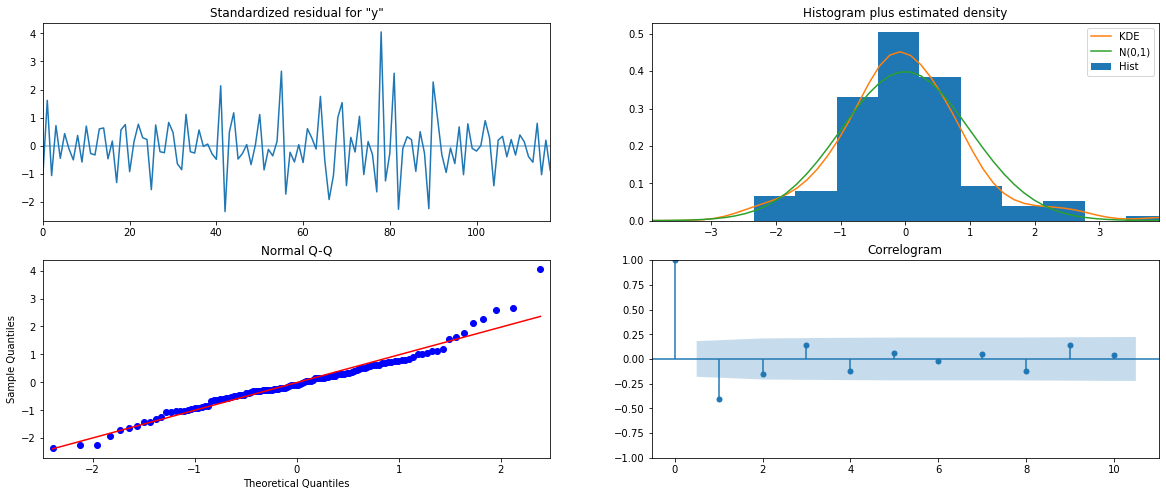

,RMSE
"SARIMA(0, 1, 0)(1, 0, 1, 12)-Manual",1787.706713


In [102]:
man_sp1 = manual_sarima(train_spark, 'Sparkling', (0, 1, 0),(1, 0, 1, 12), test_spark)
man_sp1

In [103]:
man_sp = pd.concat([man_sp, man_sp1])


In [104]:
man_sp

,RMSE
"ARIMA(0, 1, 0)-Manual",4779.154299
"SARIMA(0, 1, 0)(1, 0, 1, 12)-Manual",1787.706713


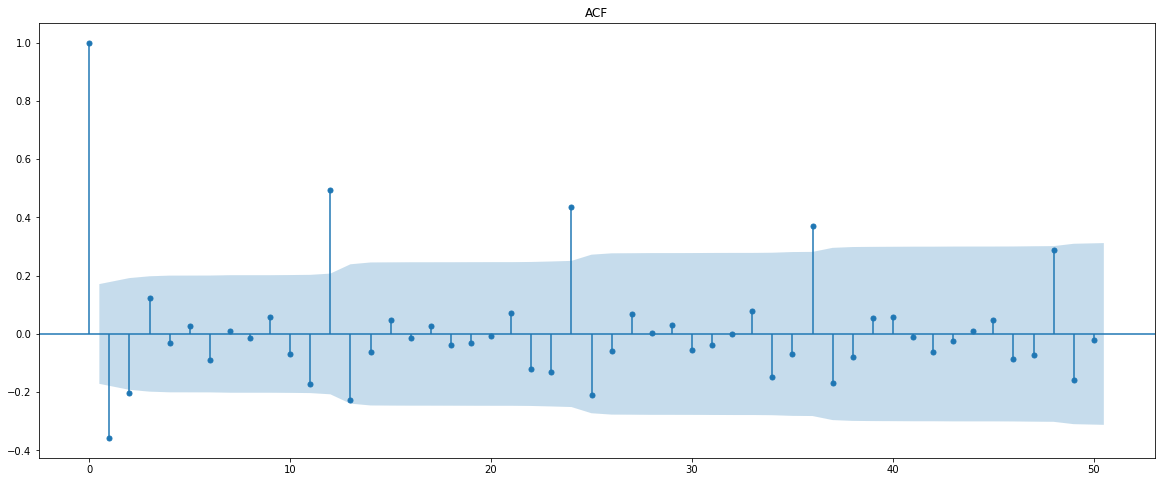

In [105]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='ACF')
plt.show()

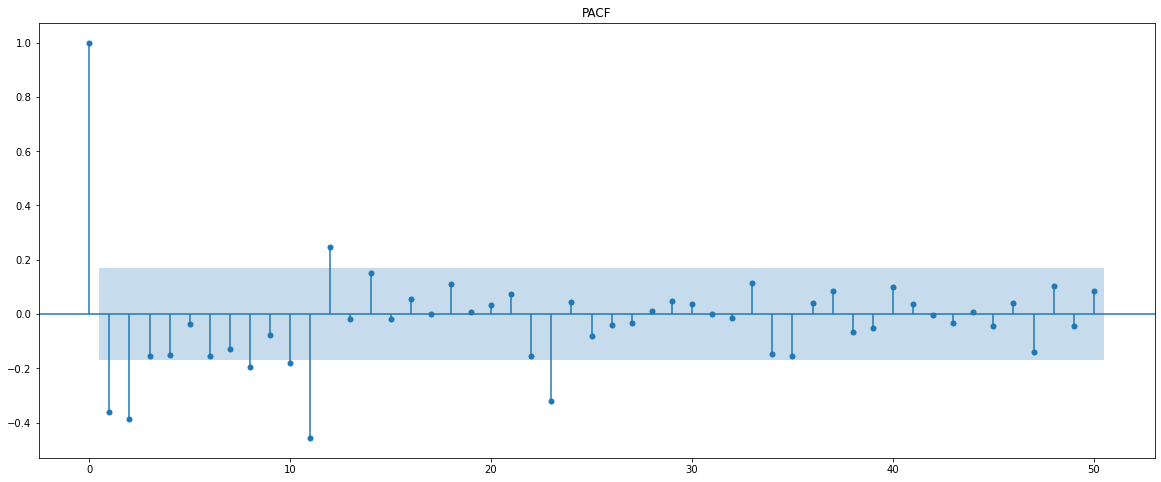

In [106]:
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='PACF')
plt.show()

In [107]:
man_ro = manual_arima(train_rose, 'Rose', (2, 1, 2), test_rose)
man_ro

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Wed, 06 Jul 2022   AIC                           1279.299
Time:                        20:47:34   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

,RMSE
"ARIMA(2, 1, 2)-Manual",15.348707


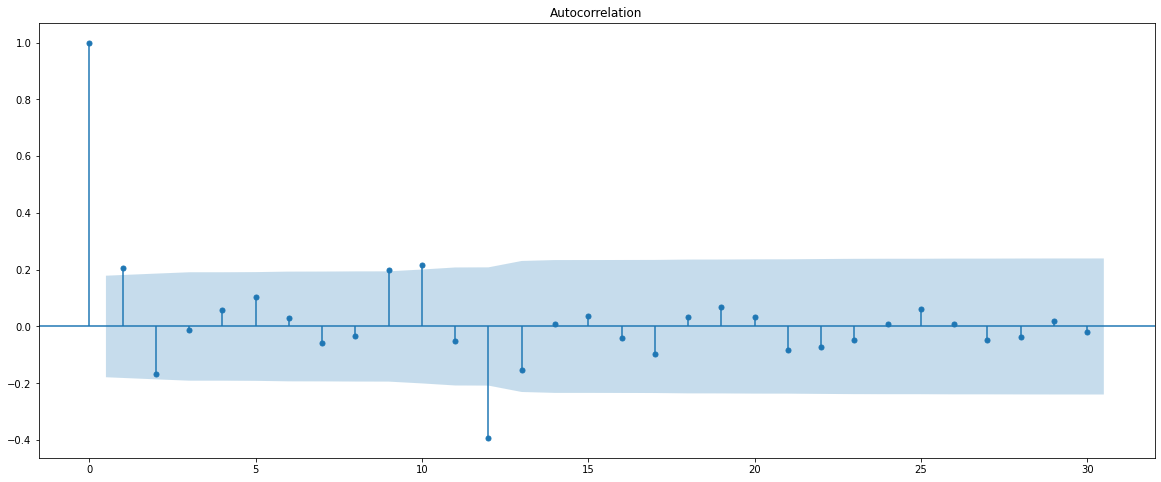

In [108]:
plot_acf((train_rose['Rose'].diff(12).dropna()).dropna(),lags=30)
plt.show()

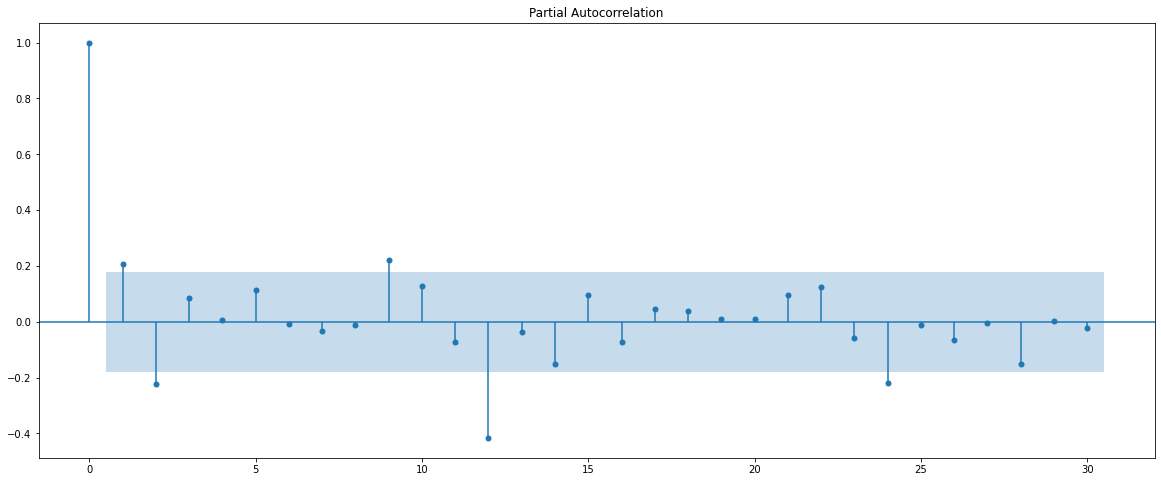

In [109]:
plot_pacf((train_rose['Rose'].diff(12).dropna()).dropna(),lags=30)
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -441.189
Date:                              Wed, 06 Jul 2022   AIC                            898.378
Time:                                      20:47:36   BIC                            919.610
Sample:                                           0   HQIC                           906.982
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4772      0.305      1.564      0.118      -0.121       1.075
ar.L2         -0.16

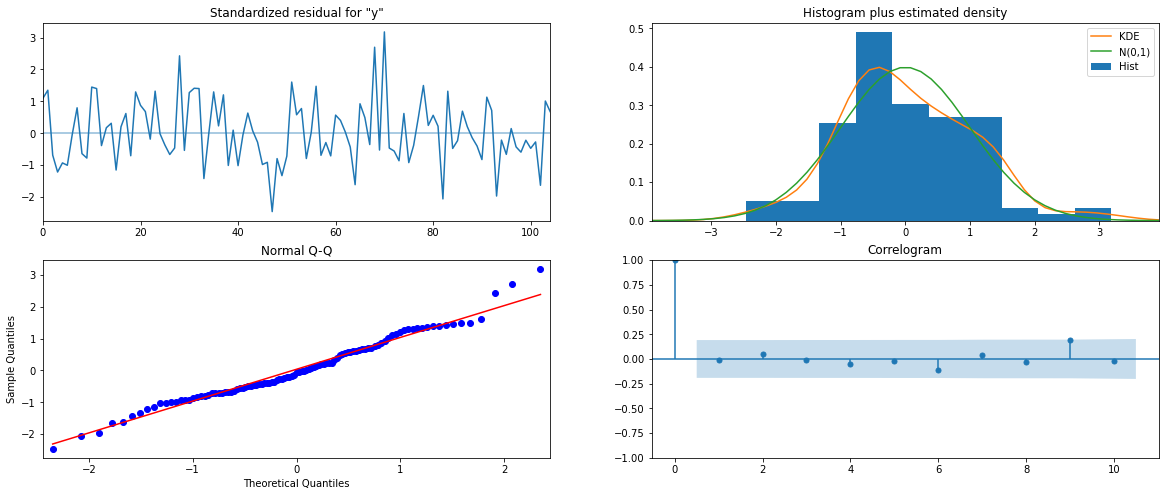

,RMSE
"SARIMA(2, 1, 2)(2, 0, 1, 12)-Manual",28.199343


In [110]:
man_ro1 = manual_sarima(train_rose, 'Rose', (2, 1, 2),(2, 0, 1, 12), test_rose)
man_ro1

In [111]:
man_ro = pd.concat([man_ro, man_ro1])

In [112]:
man_ro

,RMSE
"ARIMA(2, 1, 2)-Manual",15.348707
"SARIMA(2, 1, 2)(2, 0, 1, 12)-Manual",28.199343


#### Q8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [113]:
spark_res_df.columns = ['RMSE']
spark_res_df = pd.concat([spark_res_df, man_sp])
spark_res_df = pd.concat([spark_res_df, spark_df])

In [114]:
spark_res_df.sort_values('RMSE', inplace=True)
spark_res_df

,RMSE
TES With Additive Seasonality,378.951023
TES With Multiplicative Seasonality,404.286809
"SARIMA(0, 1, 2)(2, 0, 2, 6)-AIC",601.122857
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
Simple Exponential Smoothing,1338.008384
9pointTrailingMovingAverage,1346.278315
"ARIMA(2, 1, 2)-AIC",1374.546024


In [115]:
rose_res_df.columns = ['RMSE']
rose_res_df = pd.concat([rose_res_df, man_ro])
rose_res_df = pd.concat([rose_res_df, rose_df])

In [116]:
rose_res_df.sort_values('RMSE', inplace=True)
rose_res_df

,RMSE
2pointTrailingMovingAverage,11.529409
TES With Additive Seasonality,14.237386
4pointTrailingMovingAverage,14.448930
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
Double Exponential Smoothing,15.262498
RegressionOnTime,15.262509
"ARIMA(2, 1, 2)-Manual",15.348707
"ARIMA(0, 1, 2)-AIC",15.611357
TES With Multiplicative Seasonality,20.132468


#### Q9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

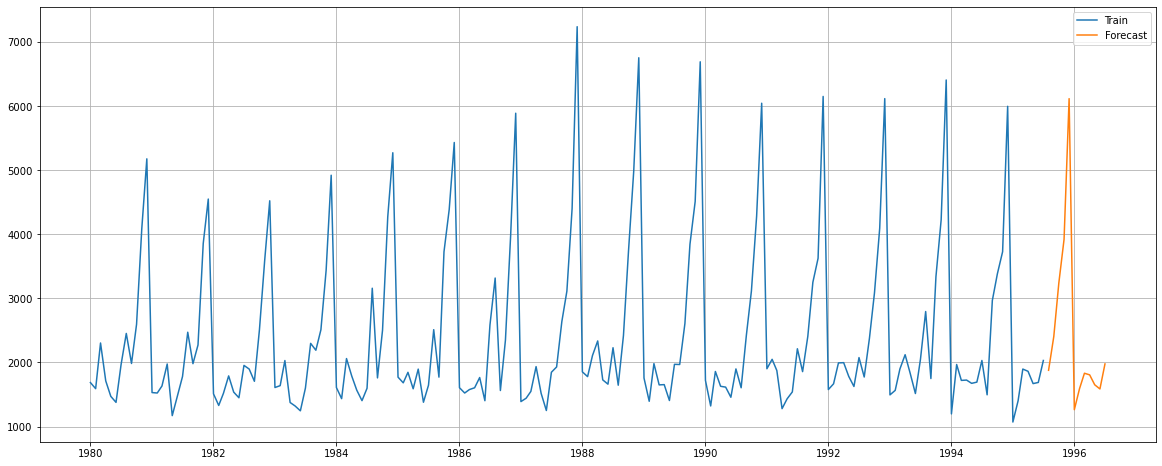

In [117]:
# Sparkling Data

model_TES = ExponentialSmoothing(df1, trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()

TES_predict =  model_TES.forecast(12)

# Forecast Plot
plt.plot(df1, label='Train')
# plt.plot(test, label='Test')

plt.plot(TES_predict, label='Forecast')

plt.legend(loc='best')
plt.grid();
    



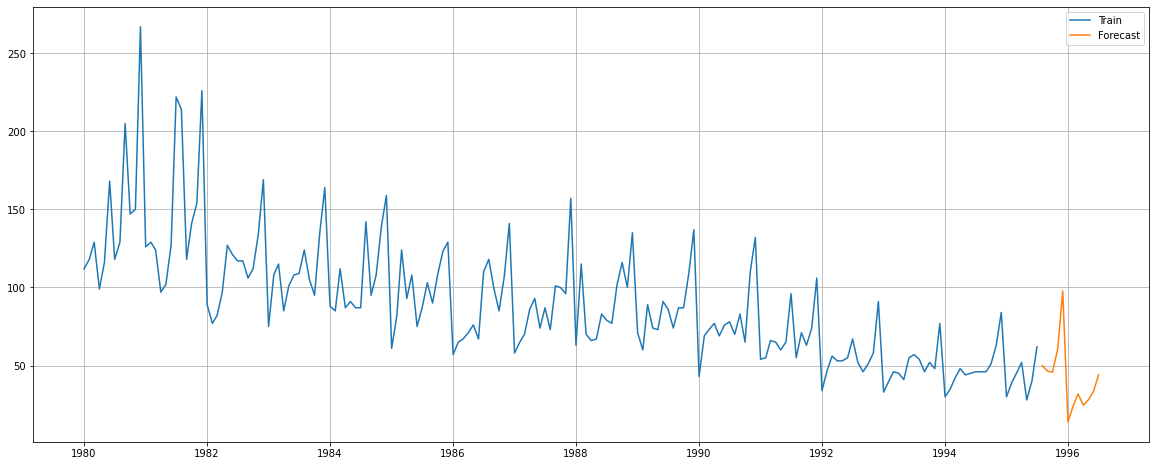

In [118]:
# Rose Data

model_TES = ExponentialSmoothing(df2, trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()

TES_predict =  model_TES.forecast(12)

# Forecast Plot
plt.plot(df2, label='Train')
# plt.plot(test, label='Test')

plt.plot(TES_predict, label='Forecast')

plt.legend(loc='best')
plt.grid();